### I. Imports et chargement des données

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.stats import gaussian_kde  # for KDE curve

In [3]:
CSV_URL = "https://huggingface.co/datasets/flodussart/getaround_pricing_project/resolve/main/get_around_pricing_project.csv"

df_pricing = pd.read_csv(CSV_URL)   
df_pricing.head()

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [4]:
df_pricing.columns

Index(['Unnamed: 0', 'model_key', 'mileage', 'engine_power', 'fuel',
       'paint_color', 'car_type', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires', 'rental_price_per_day'],
      dtype='object')

In [5]:
# Work on a copy 
df = df_pricing.copy()

# Drop export-artifact column if present
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   model_key                  4843 non-null   object
 1   mileage                    4843 non-null   int64 
 2   engine_power               4843 non-null   int64 
 3   fuel                       4843 non-null   object
 4   paint_color                4843 non-null   object
 5   car_type                   4843 non-null   object
 6   private_parking_available  4843 non-null   bool  
 7   has_gps                    4843 non-null   bool  
 8   has_air_conditioning       4843 non-null   bool  
 9   automatic_car              4843 non-null   bool  
 10  has_getaround_connect      4843 non-null   bool  
 11  has_speed_regulator        4843 non-null   bool  
 12  winter_tires               4843 non-null   bool  
 13  rental_price_per_day       4843 non-null   int64 
dtypes: bool(

In [6]:
BOOL = [
    "private_parking_available",
    "has_gps", "has_air_conditioning", "automatic_car",
    "has_getaround_connect", "has_speed_regulator",
    "winter_tires"
]

In [7]:
for col in BOOL:
    print(col, df[col].unique())

private_parking_available [ True False]
has_gps [ True False]
has_air_conditioning [False  True]
automatic_car [False  True]
has_getaround_connect [ True False]
has_speed_regulator [ True False]
winter_tires [ True False]


In [8]:
df_bool = pd.DataFrame({"bool_col": [True, False, True]})
print(df_bool)
print(df_bool.bool_col.astype(int))

   bool_col
0      True
1     False
2      True
0    1
1    0
2    1
Name: bool_col, dtype: int32


### EDA

#### 1. Statistiques descriptives

In [9]:
# Basic stats

print("Number of rows : {}".format(df.shape[0]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
print(data_desc)

print("Percentage of missing values: ")
display(100 * df.isnull().sum() / df.shape[0])

Number of rows : 4843

Display of dataset: 


,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183



Basics statistics: 
       model_key       mileage  engine_power    fuel paint_color car_type  \
count       4843  4.843000e+03    4843.00000    4843        4843     4843   
unique        28           NaN           NaN       4          10        8   
top      Citroën           NaN           NaN  diesel       black   estate   
freq         969           NaN           NaN    4641        1633     1606   
mean         NaN  1.409628e+05     128.98823     NaN         NaN      NaN   
std          NaN  6.019674e+04      38.99336     NaN         NaN      NaN   
min          NaN -6.400000e+01       0.00000     NaN         NaN      NaN   
25%          NaN  1.029135e+05     100.00000     NaN         NaN      NaN   
50%          NaN  1.410800e+05     120.00000     NaN         NaN      NaN   
75%          NaN  1.751955e+05     135.00000     NaN         NaN      NaN   
max          NaN  1.000376e+06     423.00000     NaN         NaN      NaN   

       private_parking_available has_gps has_air_condi

model_key                    0.0
mileage                      0.0
engine_power                 0.0
fuel                         0.0
paint_color                  0.0
car_type                     0.0
private_parking_available    0.0
has_gps                      0.0
has_air_conditioning         0.0
automatic_car                0.0
has_getaround_connect        0.0
has_speed_regulator          0.0
winter_tires                 0.0
rental_price_per_day         0.0
dtype: float64

<div style="font-size:0.85em; line-height:1.4">
Synthèse rapide — rental_price_per_day

- Taille : 4 843 observations — 0 % de valeurs manquantes
- Niveau de prix :
    - Médiane : 119 € / jour
    - Moyenne : 121,2 € / jour
- Dispersion :
    - IQR (Q3−Q1) = 136 − 104 = 32 €
    - Écart-type : 33,6 €
    - → La moitié des voitures se situe entre 104 € et 136 €
- Extrêmes / asymétrie : min = 10 €, max = 422 € → queue droite marquée (quelques modèles très chers)

</div>

#### 2. Distribution des prix de location

In [10]:
x = df["rental_price_per_day"]

# Histogram 
fig = px.histogram(
    x=x,
    nbins=30,
    title="Distribution du prix de location",
    labels={"x": "Prix par jour (€)", "y": "Nombre de voitures"},
    opacity=0.85,
)

# Add a KDE curve (scaled to histogram counts) 
# PX doesn't draw KDE by itself, so we compute it and overlay a line.
grid = np.linspace(x.min(), x.max(), 200)            # evaluation grid
kde = gaussian_kde(x)                                 # kernel density
bin_edges = np.histogram_bin_edges(x, bins=30)        # same number of bins
bin_width = bin_edges[1] - bin_edges[0]
y_density = kde(grid) * len(x) * bin_width            # scale density to counts

fig.add_scatter(
    x=grid,
    y=y_density,
    mode="lines",
    name="KDE",
    line=dict(width=2)
)

fig.update_layout(
    bargap=0.05,
    template="simple_white",
    title_x=0.5
)

fig.show()


In [11]:
# Compute Pearson correlations between all numeric columns and the target
corr_with_price = (
    df.corr(numeric_only=True)['rental_price_per_day']
      .sort_values(ascending=False)
)

# Display the whole sorted vector (target will be 1.0 at the top)
corr_with_price


rental_price_per_day         1.000000
engine_power                 0.625645
automatic_car                0.419761
has_getaround_connect        0.318486
has_gps                      0.310889
private_parking_available    0.281358
has_air_conditioning         0.245386
has_speed_regulator          0.227547
winter_tires                 0.018277
mileage                     -0.448912
Name: rental_price_per_day, dtype: float64

<div style="font-size:0.85em; line-height:1.35em">
Lecture des corrélations avec rental_price_per_day

- engine_power (+0.63) : corrélation forte et positive — les véhicules plus puissants sont en moyenne loués plus cher.
- automatic_car (+0.42) : corrélation modérée et positive — la boîte auto est associée à un prix/jour plus élevé.
- Équipements (connect, gps, private_parking_available, has_air_conditioning, has_speed_regulator) (+0.23 à +0.32) : corrélations positives — plus d’options → véhicules positionnés plus haut en prix.
- winter_tires (+0.02) : corrélation quasi nulle — pas de relation linéaire notable avec le prix.
- mileage (−0.45) : corrélation modérée et négative — plus le kilométrage est élevé, plus le prix/jour a tendance à baisser.

À retenir : ces coefficients mesurent des relations linéaires (Pearson). Ils n’impliquent pas de causalité et peuvent manquer des effets non linéaires ou d’interaction. À compléter par des scatter plots, binning du kilométrage/puissance et, côté modélisation, par des modèles capables de capturer des relations plus complexes.

</div>

#### 3. analyse bivariée

In [11]:
# Categorical variables to compare against price
cat_vars = ['fuel', 'car_type', 'paint_color', 'model_key']

for var in cat_vars:
    # Order categories by median price to make the plot easier to read 
    order = (
        df.groupby(var)['rental_price_per_day']
          .median()
          .sort_values()                # cheapest → most expensive
          .index.tolist()
    )

    # Box plot: price distribution per category with outliers shown 
    fig = px.box(
        df,
        x=var,
        y='rental_price_per_day',
        color=var,                       # color by the same categorical variable
        points='outliers',               # display outliers as points
        category_orders={var: order},    # use the ordered categories
        title=f"Prix par jour en fonction de {var}",
        labels={
            var: var.replace('_', ' '), 
            'rental_price_per_day': 'Prix par jour (€)'
        },
        hover_data=['engine_power', 'mileage']  # add a bit more context on hover (optional)
    )

    fig.update_layout(
        title_x=0.5,
        showlegend=False,               
        plot_bgcolor='white',
        xaxis_tickangle=-45
    )

    fig.show()



In [12]:
# Count fully duplicated rows 
n_duplicates = df_pricing.duplicated().sum()
print("Number of duplicate rows:", n_duplicates)

# Fast percentile-based bounds (1st and 99th percentiles) for key numeric fields.
# Useful to spot extreme values/outliers and set reasonable plotting limits.
q_1_99 = df_pricing[['mileage', 'engine_power', 'rental_price_per_day']].quantile([0.01, 0.99])
print(q_1_99)



Number of duplicate rows: 0
        mileage  engine_power  rental_price_per_day
0.01   17759.24          85.0                  28.0
0.99  320967.02         240.0                 216.0


<span style="font-size:0.85em">

Doublons & bornes plausibles (1ᵉʳ–99ᵉ percentiles)  
- **Doublons** : `0` ligne(s) dupliquée(s) 
- **Bornes 1 %–99 %** (repères pour valeurs extrêmes) :  
  - **mileage** : ~**17 759** à **320 967** km  
  - **engine_power** : **85** à **240** ch  
  - **rental_price_per_day** : **28** à **216** €  

**Lecture** : ces percentiles donnent des fourchettes “plausibles”. Les points bien en-dehors peuvent relever d’erreurs de saisie, de cas très rares ou de véhicules atypiques. On peut s’en servir pour fixer des limites de visualisation, vérifier des outliers ou définir des règles de nettoyage douces (sans supprimer d’office).  
</span>


In [14]:
cats = ['fuel','car_type','paint_color','model_key']
summary = {}
for c in cats:
    g = (df_pricing
         .groupby(c)['rental_price_per_day']
         .agg(['count','mean','median','std'])
         .sort_values('mean', ascending=False))
    summary[c] = g
summary['fuel'].head(10) 


,count,mean,median,std
fuel,,,,
hybrid_petrol,8,184.750000,157.5,62.091522
electro,3,145.000000,145.0,1.000000
diesel,4641,121.548373,120.0,32.618495
petrol,191,110.068063,109.0,47.797386


In [15]:
MIN_COUNT = 20  # minimum number of occurrences to be included in the table
tab_fuel = (summary['fuel']
            .query('count >= @MIN_COUNT')
            .assign(uplift_pct=lambda d: 100*(d['mean'] - df_pricing['rental_price_per_day'].mean())
                                        / df_pricing['rental_price_per_day'].mean())
            .sort_values('mean', ascending=False))
tab_fuel.head(10)

,count,mean,median,std,uplift_pct
fuel,,,,,
diesel,4641,121.548373,120.0,32.618495,0.275410
petrol,191,110.068063,109.0,47.797386,-9.195658


<div style="font-size:0.85em; line-height:1.45">
Lecture du tableau summary['fuel'] (moyenne / médiane / écart-type par carburant)

- diesel : ~121,5 €/j (proche de la moyenne globale), dispersion modérée.
- petrol : ~110 €/j, ≈ 9 % moins cher que la moyenne globale.
- hybrid_petrol & electro : moyennes élevées mais effectifs très faibles (8 et 3) → interprétation à prendre avec précaution.

Dans le tableau filtré tab_fuel (MIN_COUNT = 20) :
- diesel : uplift ≈ +0,3 % vs moyenne globale (quasi neutre).
- petrol : uplift ≈ −9,2 %, confirmant un prix moyen significativement plus bas.

</div>

In [17]:
# Bar plot of mean price per car type with error bars (std dev)
tab = (summary['car_type']
       .query('count >= @MIN_COUNT')
       .reset_index())

fig = px.bar(
    tab, x='mean', y='car_type', orientation='h',
    error_x='std',  # error bars represent standard deviation
    title="Prix moyen par type de voiture (barres d’erreur = σ)"
)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()


<div style="font-size:0.85em; line-height:1.45">
Lecture du graphique « Prix moyen par type de voiture (barres d’erreur = σ) »

- Coupe et SUV affichent les prix moyens les plus élevés.
- Subcompact, estate et hatchback sont les segments les moins chers.
- Les barres d’erreur (écart-type) sont larges pour certains segments (p. ex. SUV, convertible) → forte dispersion des prix au sein du segment.
- Insight : le type de voiture est un facteur discriminant du prix, à intégrer dans le modèle/les règles de tarification.
</div>

Conclusion rapide : le type de carburant et le type de voiture expliquent une part notable de la variabilité du prix. Pour la tarification ou un futur modèle ML, conserver ces variables (et l’écart-type par groupe) et traiter avec prudence les classes rares.

In [ ]:
# List of boolean features we want to evaluate
bools = [
    'private_parking_available', 'has_gps', 'has_air_conditioning',
    'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires'
]

# Reshape to long format so each row is:
#    (rental_price_per_day, feature=<one of bools>, present=True/False)
# Group by (feature, present) and compute the mean rental price
# Unstack to get two columns per feature: mean price when present=True and when present=False
effets_bool = (
    df_pricing
    .melt(
        id_vars=['rental_price_per_day'],   # keep the target as identifier
        value_vars=bools,                   # boolean features to melt
        var_name='feature',                 # new column: which feature
        value_name='present'                # new column: True / False
    )
    .groupby(['feature', 'present'])['rental_price_per_day']  # group by feature & presence
    .mean()                                   # average price within each group
    .unstack()                                # columns become present=False / present=True
)

# Compute the incremental effect on price if the feature is True vs False
effets_bool['Delta_if_true'] = effets_bool[True] - effets_bool[False]

# Sort features by the largest positive effect (most price uplift when present=True)
effets_bool.sort_values('Delta_if_true', ascending=False)



present,False,True,Delta_if_true
feature,,,
automatic_car,114.199948,149.513514,35.313565
has_gps,100.809761,126.550925,25.741164
has_getaround_connect,111.339074,132.786099,21.447025
has_air_conditioning,117.071410,137.587935,20.516524
private_parking_available,110.781293,129.762585,18.981292
has_speed_regulator,116.906369,134.754491,17.848122
winter_tires,118.942249,121.380151,2.437901


<div style="opacity:0.85">
Effet moyen des options (prix/jour)

Le tableau compare le prix moyen lorsque l’option est absente (False) vs présente (True), et la colonne Delta_if_true indique la surcote moyenne en € quand l’option est présente.

Lectures clés :
- automatic_car : +35.3 €/jour en moyenne — l’automatique est l’option la plus “valorisée”.
- has_gps : +25.7 €/jour.
- has_getaround_connect : +21.4 €/jour.
- has_air_conditioning : +20.5 €/jour.
- private_parking_available : +19.0 €/jour.
- has_speed_regulator : +17.8 €/jour.
- winter_tires : +2.4 €/jour — effet moyen faible (probablement saisonnier / contextuel).

À garder en tête :
- Il s’agit de corrélations univariées : elles ne prouvent pas la causalité. Les effets peuvent être confondus par le segment (SUV vs citadine), la marque/modèle, etc.
- Certaines options sont peu fréquentes, ce qui peut rendre la moyenne instable.

Pour des conclusions actionnables (pricing), il faudra contrôler simultanément les variables dans un modèle multivarié (régression/ML) et valider par cross-validation.

</div>

In [19]:
df_pricing["rental_price_per_day"].describe(percentiles=[0.01, 0.99])

count    4843.000000
mean      121.214536
std        33.568268
min        10.000000
1%         28.000000
50%       119.000000
99%       216.000000
max       422.000000
Name: rental_price_per_day, dtype: float64

In [23]:
# Quick inspection of the core variable
print("Statistiques brutes sur rental_price_per_day :")
display(
    df_pricing["rental_price_per_day"].describe(
        percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]
    )
)

fig_raw = px.histogram(
    df_pricing,
    x="rental_price_per_day",
    nbins=50,
    title="Distribution du prix de location (brut)",
    labels={"rental_price_per_day": "Prix par jour (€)", "count": "Nombre"},
)
fig_raw.update_layout(title_x=0.5, plot_bgcolor="white")
fig_raw.show()
print(
    " On voit les valeurs extrêmes : certaines locations <20€ ou >400€ "
    "(probablement des cas marginaux)."
)

q_low, q_high = df_pricing["rental_price_per_day"].quantile([0.01, 0.99])

print(f"Bornage retenu : [{q_low:.1f} €, {q_high:.1f} €] (1er-99e percentile)")

df_pricing = df_pricing.copy()
df_pricing["rental_price_clipped"] = df_pricing["rental_price_per_day"].clip(
    q_low, q_high
)

# Stats after clipping
print("\nStatistiques après bornage (rental_price_clipped) :")
display(
    df_pricing[["rental_price_per_day", "rental_price_clipped"]].describe(
        percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]
    )
)

fig_clip = px.histogram(
    df_pricing,
    x="rental_price_clipped",
    nbins=50,
    title="Distribution du prix de location (après bornage)",
    labels={"rental_price_clipped": "Prix par jour (€)", "count": "Nombre"},
)
fig_clip.update_layout(title_x=0.5, plot_bgcolor="white")
fig_clip.show()


# Comparaison Connect vs non-Connect

# Safety: ensure boolean-like column is really boolean
if "has_getaround_connect" in df_pricing.columns:
    df_pricing["has_getaround_connect"] = (
        df_pricing["has_getaround_connect"]
        .astype("boolean")
        .fillna(False)
    )
else:
    raise ValueError(
        "Column 'has_getaround_connect' is missing from df_pricing."
    )

connect_stats = (
    df_pricing
    .groupby("has_getaround_connect")["rental_price_clipped"]
    .agg(["count", "mean", "median", "std"])
    .rename(
        index={True: "Connect = True", False: "Connect = False"},
        columns={
            "count": "nb_voitures",
            "mean": "prix_moyen_journalier",
            "median": "prix_médian_journalier",
            "std": "écart_type",
        }
    )
)

print("\nPrix journalier par statut 'Getaround Connect' (après bornage) :")
display(connect_stats)

fig_box = px.box(
    df_pricing,
    x="has_getaround_connect",
    y="rental_price_clipped",
    color="has_getaround_connect",
    title="Comparaison du prix par jour selon le statut Connect",
    labels={
        "has_getaround_connect": "Véhicule équipé Connect ?",
        "rental_price_clipped": "Prix par jour (€)",
    },
    points="all",  # optionally "outliers" or False
)
fig_box.update_layout(title_x=0.5, plot_bgcolor="white")
fig_box.show()

print(
    "On voit que les véhicules Connect sont plus chers en moyenne.\n"
    "C'est important pour la partie business : appliquer un buffer "
    "spécifiquement aux véhicules Connect peut avoir un coût unitaire "
    "plus élevé en termes de CA potentiel."
)

# Mean prices to use in the dashboard
mean_price_connect = df_pricing.loc[
    df_pricing["has_getaround_connect"] == True,
    "rental_price_clipped"
].mean()

mean_price_nonconnect = df_pricing.loc[
    df_pricing["has_getaround_connect"] == False,
    "rental_price_clipped"
].mean()

mean_price_global = df_pricing["rental_price_clipped"].mean()

print("\nRésumé pour le dashboard (€/jour moyens à utiliser) :")
print(f"- Moyenne globale        : {mean_price_global:.1f} €/jour")
print(f"- Moyenne non-Connect    : {mean_price_nonconnect:.1f} €/jour")
print(f"- Moyenne Connect        : {mean_price_connect:.1f} €/jour")

print(
    "\nInterprétation soutenance :\n"
    "« Les véhicules Connect sont en moyenne plus chers (~{} €/j contre ~{} €/j "
    "pour les véhicules classiques). Dans la simulation business du buffer, "
    "quand je sélectionne 'Connect uniquement', j'utilise le prix journalier "
    "moyen des Connect. Ça me permet d'estimer l'impact CA d'un buffer ciblé "
    "sur cette flotte à forte valeur. »".format(
        mean_price_connect, mean_price_nonconnect
    )
)


Statistiques brutes sur rental_price_per_day :


count    4843.000000
mean      121.214536
std        33.568268
min        10.000000
1%         28.000000
25%       104.000000
50%       119.000000
75%       136.000000
99%       216.000000
max       422.000000
Name: rental_price_per_day, dtype: float64

 On voit les valeurs extrêmes : certaines locations <20€ ou >400€ (probablement des cas marginaux).
Bornage retenu : [28.0 €, 216.0 €] (1er-99e percentile)

Statistiques après bornage (rental_price_clipped) :


,rental_price_per_day,rental_price_clipped
count,4843.000000,4843.000000
mean,121.214536,120.964072
std,33.568268,32.204991
min,10.000000,28.000000
1%,28.000000,28.000000
25%,104.000000,104.000000
50%,119.000000,119.000000
75%,136.000000,136.000000
99%,216.000000,216.000000
max,422.000000,216.000000



Prix journalier par statut 'Getaround Connect' (après bornage) :


,nb_voitures,prix_moyen_journalier,prix_médian_journalier,écart_type
has_getaround_connect,,,,
Connect = False,2613,110.979717,110.0,32.455317
Connect = True,2230,132.663229,130.0,27.656225


On voit que les véhicules Connect sont plus chers en moyenne.
C'est important pour la partie business : appliquer un buffer spécifiquement aux véhicules Connect peut avoir un coût unitaire plus élevé en termes de CA potentiel.

Résumé pour le dashboard (€/jour moyens à utiliser) :
- Moyenne globale        : 121.0 €/jour
- Moyenne non-Connect    : 111.0 €/jour
- Moyenne Connect        : 132.7 €/jour

Interprétation soutenance :
« Les véhicules Connect sont en moyenne plus chers (~132.66322869955158 €/j contre ~110.97971680061232 €/j pour les véhicules classiques). Dans la simulation business du buffer, quand je sélectionne 'Connect uniquement', j'utilise le prix journalier moyen des Connect. Ça me permet d'estimer l'impact CA d'un buffer ciblé sur cette flotte à forte valeur. »


In [25]:
df_pricing.groupby("has_getaround_connect")["rental_price_per_day"].agg(["count", "mean", "median", "std"])


,count,mean,median,std
has_getaround_connect,,,,
False,2613,111.339074,110.0,34.536272
True,2230,132.786099,130.0,28.315968


,mileage,engine_power,rental_price_per_day
mileage,1.000000,-0.050116,-0.448912
engine_power,-0.050116,1.000000,0.625645
rental_price_per_day,-0.448912,0.625645,1.000000


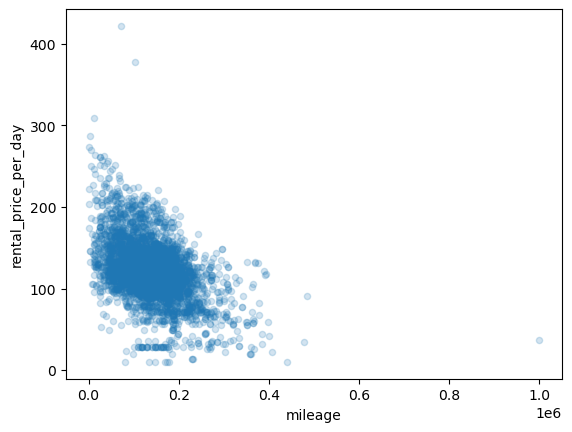

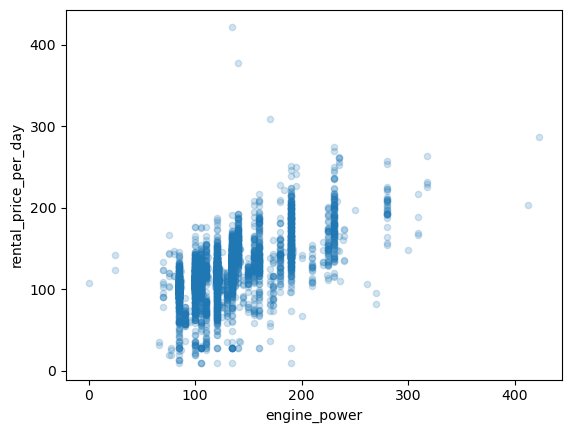

In [17]:
# scatter + tendance
_ = df_pricing.plot.scatter(x='mileage', y='rental_price_per_day', alpha=.2)
_ = df_pricing.plot.scatter(x='engine_power', y='rental_price_per_day', alpha=.2)

# corrélation (num only)
num_cols = ['mileage','engine_power','rental_price_per_day']
df_pricing[num_cols].corr()


<div style="font-size:0.85rem">
Lecture des résultats (corrélations + nuages de points)

- Corrélations numériques
    - rental_price_per_day est négativement corrélé au kilométrage (mileage) : -0,45 → plus une voiture a roulé, plus le prix journalier tend à baisser.
    - rental_price_per_day est positivement corrélé à la puissance moteur (engine_power) : +0,63 → les véhicules plus puissants sont loués plus cher.
    - La corrélation entre mileage et engine_power est proche de 0 (≈ -0,05) → ces deux variables sont quasiment indépendantes dans cet échantillon.

- Nuage de points – Prix vs Kilométrage
    - On observe une tendance décroissante du prix lorsque le kilométrage augmente.
    - La dispersion est forte pour les faibles kilométrages (de nombreux véhicules « quasi neufs » à des prix variés).
    - Quelques valeurs atypiques (prix très bas/élevés ou kilométrages très élevés) existent mais restent peu nombreuses.

- Nuage de points – Prix vs Puissance
    - La relation est croissante : le prix augmente avec la puissance.
    - Les bandes verticales reflètent des paliers de puissance (valeurs discrètes proposées par les constructeurs).
    - L’hétéroscédasticité (dispersion qui grandit avec la puissance) suggère que la variabilité de prix est plus élevée pour les voitures puissantes (effet d’équipements/segments).

Implications rapides pour la tarification / le modèle :
- engine_power et mileage sont deux variables explicatives clés à conserver.
- Penser à gérer les outliers et à tester des transformations (p. ex. log du prix) pour mieux modéliser l’hétéroscédasticité.
- Les paliers visibles peuvent justifier des effets non linéaires (splines, binning, termes quadratiques) sur engine_power.

</div>

In [18]:
top_models = (df_pricing.groupby('model_key')['rental_price_per_day']
              .mean().sort_values(ascending=False))
top_models.head(10), top_models.tail(10)

(model_key
 Suzuki         223.875000
 Mini           204.000000
 Lexus          193.000000
 Maserati       188.666667
 Subaru         182.340909
 SEAT           181.239130
 Mitsubishi     170.675325
 KIA Motors     159.000000
 Alfa Romeo     157.666667
 Lamborghini    157.500000
 Name: rental_price_per_day, dtype: float64,
 model_key
 PGO         126.090909
 Mercedes    121.360825
 Renault     120.609170
 BMW         117.432890
 Nissan      111.130909
 Ford        111.000000
 Citroën     108.764706
 Peugeot     104.917445
 Fiat         93.000000
 Mazda        67.000000
 Name: rental_price_per_day, dtype: float64)

<div style="font-size:0.85rem">
Lecture rapide – Prix moyen par marque (model_key)

- Le tableau affiche la moyenne du prix/jour par marque puis triée du plus cher au moins cher.
- En haut du classement, on trouve des marques avec des prix moyens élevés (p. ex. Suzuki, Mini, Lexus, Maserati, Subaru, SEAT, Mitsubishi, KIA Motors, Alfa Romeo, Lamborghini).

Cela reflète à la fois le positionnement de gamme et la composition du parc (SUV/versions sportives, équipements, puissance).

- En bas, des marques plus grand public (Mazda, Fiat, Peugeot, Citroën, Ford, Nissan, BMW, Renault, Mercedes, PGO ici) présentent des prix moyens plus bas sur cet échantillon.

Points d’attention :
- Ces moyennes ne tiennent pas compte des différences internes aux marques (type de carrosserie, puissance, âge/kilométrage, options…).
- Le nombre d’annonces par marque peut varier fortement : une moyenne sur peu d’observations peut être instable.
- Il est utile de regarder aussi la médiane et l’écart-type, voire de filtrer par segment (ex. SUV vs citadine) pour des comparaisons plus justes.

Prochaines étapes suggérées :
- Ajouter un compte d’annonces par marque et masquer celles avec effectif trop faible.
- Comparer les prix à caractéristiques égales (puissance, kilométrage, type de véhicule) pour isoler l’effet “marque”.
- Visualiser par marque des intervalles de confiance ou barres d’erreur (σ) pour voir l’incertitude.

</div>

In [24]:
# Ensure that 'model_key' and 'car_type' columns exist
pd.set_option("display.max_colwidth", None)

if {"model_key", "car_type"}.issubset(df.columns):

    # Light data cleaning 
    # Keep only relevant columns and remove rows with missing values
    df_map = df[["model_key", "car_type"]].dropna().copy()

    # Standardize strings: lowercase, remove extra spaces
    df_map["model_key"] = df_map["model_key"].astype(str).str.lower().str.strip()
    df_map["car_type"] = df_map["car_type"].astype(str).str.lower().str.strip()

    # Grouping 
    # Aggregate unique car types for each model_key
    model_car_types = (
        df_map.groupby("model_key")["car_type"]
        .unique()                # Keep only unique values per model
        .reset_index()           # Flatten the result into a DataFrame
        .sort_values("model_key")  # Sort alphabetically by model_key
    )

    # Display the mapping between models and car types
    display(model_car_types)

else:
    # Warn user if required columns are missing
    print("Columns 'model_key' or 'car_type' are missing from dataset_pricing.")


,model_key,car_type
0,alfa romeo,[hatchback]
1,audi,"[estate, hatchback, sedan, van]"
2,bmw,"[estate, hatchback, sedan, subcompact, suv, van]"
3,citroën,"[convertible, coupe, estate, hatchback, sedan, subcompact]"
4,ferrari,"[hatchback, sedan]"
5,fiat,"[hatchback, subcompact]"
6,ford,[hatchback]
7,honda,[sedan]
8,kia motors,[hatchback]
9,lamborghini,"[hatchback, sedan]"


In [ ]:
pd.set_option("display.max_colwidth", None)

# Light data cleaning 
# Select relevant columns and standardize text format
df_map = df[["model_key", "paint_color"]].copy()
df_map["model_key"] = df_map["model_key"].astype(str).str.lower().str.strip()
df_map["paint_color"] = df_map["paint_color"].astype(str).str.lower().str.strip()

# Grouping 
# Create a list of unique paint colors for each model
model_paint_color = (
    df_map.groupby("model_key")["paint_color"]
    .unique()                  # Keep unique colors per model
    .reset_index()             # Convert groupby object to a DataFrame
    .sort_values("model_key")  # Sort alphabetically by model
)

# Display the mapping between models and their paint colors
display(model_paint_color)


,model_key,paint_color
0,alfa romeo,[grey]
1,audi,"[blue, white, black, grey, brown, silver, green, red, beige]"
2,bmw,"[red, grey, white, silver, blue, black, green, brown, orange, beige]"
3,citroën,"[black, grey, white, red, silver, blue, beige, brown, green]"
4,ferrari,"[black, silver, grey, white, blue, brown]"
5,fiat,"[black, white]"
6,ford,"[red, white, grey, black, silver]"
7,honda,[brown]
8,kia motors,"[silver, black, beige]"
9,lamborghini,"[grey, white]"


In [ ]:
df_check = df.copy()
df_check["model_key"] = df_check["model_key"].str.lower().str.strip()
df_check["car_type"] = df_check["car_type"].str.lower().str.strip()

pair_counts = (
    df_check.groupby(["model_key", "car_type"])
    .size()
    .reset_index(name="count")
    .sort_values("count")
)

pair_counts.head(20)


,model_key,car_type,count
31,mini,sedan,1
54,renault,suv,1
49,porsche,subcompact,1
44,pgo,convertible,1
34,nissan,van,1
28,mazda,sedan,1
25,lamborghini,sedan,1
24,lamborghini,hatchback,1
22,honda,sedan,1
20,fiat,subcompact,1


In [22]:
low_freq = pair_counts[pair_counts["count"] < 5]
low_freq


,model_key,car_type,count
31,mini,sedan,1
54,renault,suv,1
49,porsche,subcompact,1
44,pgo,convertible,1
34,nissan,van,1
28,mazda,sedan,1
25,lamborghini,sedan,1
24,lamborghini,hatchback,1
22,honda,sedan,1
20,fiat,subcompact,1


In [23]:
n_impacted = low_freq["count"].sum()
n_total = len(df_check)

print(f"Voitures potentiellement incorrectes : {n_impacted:,}")
print(f"Impact : {n_impacted / n_total * 100:.2f} % du dataset")


Voitures potentiellement incorrectes : 36
Impact : 0.74 % du dataset


In [24]:
anomalies = (
    low_freq
    .groupby("model_key")["car_type"]
    .apply(list)
    .reset_index(name="car_types_suspectes")
)

anomalies


,model_key,car_types_suspectes
0,alfa romeo,[hatchback]
1,audi,[van]
2,bmw,[van]
3,ferrari,[hatchback]
4,fiat,"[subcompact, hatchback]"
5,honda,[sedan]
6,kia motors,[hatchback]
7,lamborghini,"[sedan, hatchback]"
8,lexus,[sedan]
9,mazda,[sedan]
